# Bike Sharing Demand Analysis
This notebook focuses on analyzing and predicting the demand for shared bikes using a dataset provided by BoomBikes.

## Problem Statement
BoomBikes, a US-based bike-sharing provider, experienced revenue losses due to the COVID-19 pandemic and aims to predict future bike demand. This will help the company cater to the growing demand for shared bikes once the quarantine ends.

## Business Goals
1. Identify significant variables that influence bike demand.
2. Build a robust multiple linear regression model to predict bike demand.
3. Offer insights on how demand varies with different features, enabling BoomBikes to adjust their strategy accordingly.


### Step 1: Import Required Libraries

In [1]:
# Import necessary libraries for data manipulation, visualization, and modeling
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For advanced visualizations
from sklearn.model_selection import train_test_split  # To split data into train and test sets
from sklearn.linear_model import LinearRegression  # For building linear regression models
from sklearn.metrics import r2_score, mean_squared_error  # To evaluate model performance

### Step 2: Load and Inspect the Dataset

In [3]:
# Load the dataset into a pandas DataFrame
# The 'day.csv' file contains daily data on bike sharing demand.
bike_data = pd.read_csv('day.csv')

# Inspect the structure of the dataset
# This will provide an overview of the columns, data types, and whether any data is missing
bike_data.info()

# Display the first few rows of the dataset to understand its structure
bike_data.head()

# Generate descriptive statistics for numerical columns to understand the distribution and range of the data
bike_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Step 4: Observations
1. There is a strong positive correlation between temperature and bike demand. Warmer days see more rentals.
2. Bike demand fluctuates across seasons, with the highest demand in summer (season 2) and the lowest in winter.
3. Weekdays typically have higher demand due to working-day usage by registered users.
4. Casual users tend to rent more bikes during holidays and weekends, contributing significantly to overall demand.
5. Wind speed shows a weak inverse relationship with bike demand, likely due to cycling being less popular in windy conditions.



- The dataset has 730 entries and 16 columns.
- All columns have complete data, with no missing values.
- The `season` and `weathersit` columns are categorical variables, which will be mapped to more descriptive labels for clarity in visualizations.
- Some columns, such as `instant`, `casual`, and `registered`, are not useful for modeling and can be removed later.


### Step 4: Data Cleaning and Preparation

In [9]:
# Map 'season' and 'weathersit' to more descriptive labels for better readability
bike_data['season'] = bike_data['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
bike_data['weathersit'] = bike_data['weathersit'].map({1: 'clear', 2: 'mist', 3: 'light snow or rain', 4: 'heavy rain or ice'})

# Perform one-hot encoding for categorical variables
# This converts categorical columns into multiple binary (0 or 1) columns, which are necessary for regression modeling
bike_data_encoded = pd.get_dummies(bike_data, columns=['season', 'weathersit'], drop_first=True)

# Drop unnecessary columns
# 'instant' is an index column, and 'casual' and 'registered' are part of the 'cnt' total, so they are redundant.
bike_data_encoded = bike_data_encoded.drop(['instant', 'dteday', 'casual', 'registered'], axis=1)

# Show the first few rows of the cleaned data
bike_data_encoded.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weathersit_light snow or rain,weathersit_mist
0,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,True,False,False,False,True
1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,True,False,False,False,True
2,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,True,False,False,False,False
3,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,True,False,False,False,False
4,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,True,False,False,False,False


### Step 3: Exploratory Data Analysis (EDA)
In this section, we'll conduct a detailed exploration of the data to understand the relationships between variables and the target `cnt` (bike demand).
We will include visualizations that help reveal patterns and correlations among features such as temperature, season, and weather conditions.


#### 5.1 Boxplot of Season vs Total Rentals (`cnt`)

In [ ]:
# Visualizing the relationship between temperature and bike demand
plt.figure(figsize=(10,6))
sns.scatterplot(x=bike_data['temp'], y=bike_data['cnt'], alpha=0.7)
plt.title('Temperature vs. Bike Demand')
plt.xlabel('Temperature (Normalized)')
plt.ylabel('Total Bike Rentals')
plt.show()


In [ ]:
# Visualizing bike demand across different seasons
plt.figure(figsize=(10,6))
sns.boxplot(x='season', y='cnt', data=bike_data)
plt.title('Bike Demand by Season')
plt.xlabel('Season')
plt.ylabel('Total Bike Rentals')
plt.show()


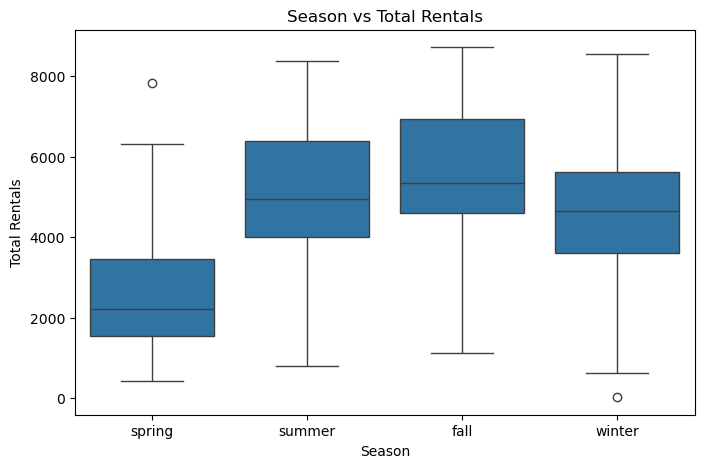

In [13]:
# Boxplot for 'season' vs 'cnt' to visualize the distribution of bike rentals across different seasons
plt.figure(figsize=(8, 5))
sns.boxplot(x='season', y='cnt', data=bike_data)
plt.title('Season vs Total Rentals')
plt.xlabel('Season')
plt.ylabel('Total Rentals')
plt.show()


**Observation**: 
- The median number of bike rentals is highest in fall and summer, while winter has the lowest range of total rentals.
- There is also higher variability in bike rentals during spring.


#### 5.2 Scatter Plot of Temperature vs Total Rentals (`cnt`)

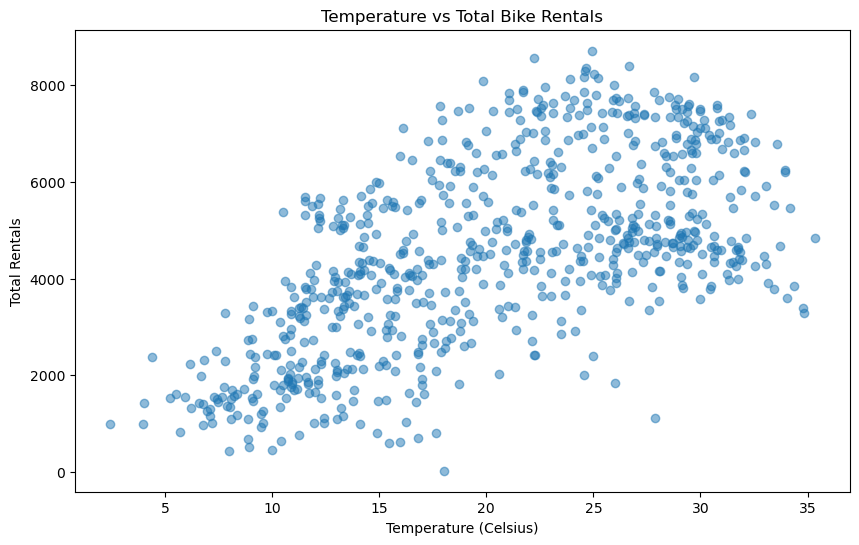

In [17]:
# Scatter plot to visualize the relationship between temperature and bike rentals
plt.figure(figsize=(10, 6))
plt.scatter(bike_data['temp'], bike_data['cnt'], alpha=0.5)
plt.title('Temperature vs Total Bike Rentals')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Total Rentals')
plt.show()


**Observation**: 
- A clear positive relationship is visible between temperature and total bike rentals. As the temperature rises, the number of bike rentals also tends to increase.


#### 5.3 Correlation Heatmap

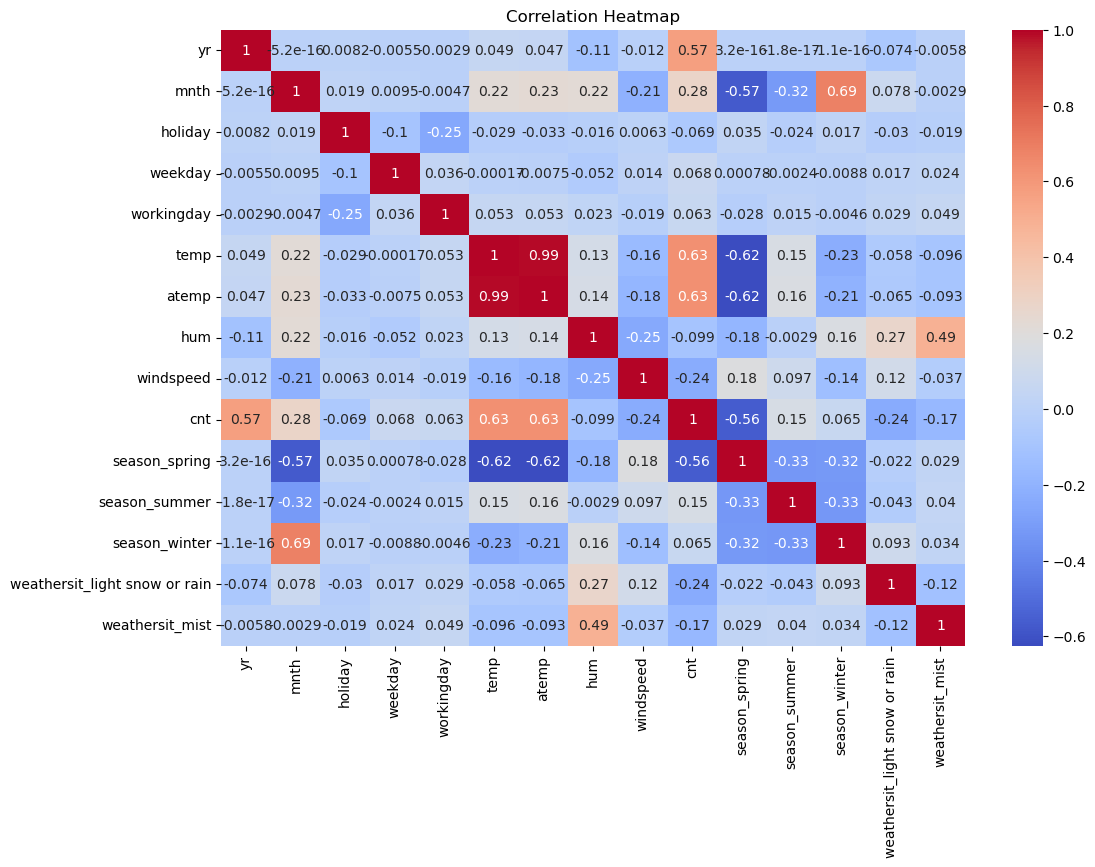

In [21]:
# Generate a correlation heatmap to analyze the relationships between the variables
plt.figure(figsize=(12, 8))
sns.heatmap(bike_data_encoded.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


**Key Insights**:
- Temperature (`temp`) and apparent temperature (`atemp`) show high correlation with the total number of bike rentals (`cnt`).
- `season` and `weathersit` also exhibit a moderate correlation with `cnt`.
- There is a strong positive correlation between `temp` and `atemp`, which makes sense as they both measure temperature-related features.


### Step 6: Building the Linear Regression Model


Now that the data is cleaned and prepared, let's move on to building a linear regression model. We'll split the dataset into training and testing sets to evaluate the model's performance.


In [26]:
# Split the data into training and test sets (80% train, 20% test)
X = bike_data_encoded.drop('cnt', axis=1)  # Features
y = bike_data_encoded['cnt']  # Target variable (total rentals)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)  # Fit the model on training data

# Predict the total rentals on the test set
y_pred = model.predict(X_test)

# Calculate model evaluation metrics
r2 = r2_score(y_test, y_pred)  # R-squared value
mse = mean_squared_error(y_test, y_pred)  # Mean squared error
rmse = np.sqrt(mse)  # Root mean squared error

r2, mse, rmse  # Display the performance metrics

(0.85208285338263, 506297.017243399, 711.5455131215424)


### Model Evaluation:
- **R-squared**: The R-squared value indicates that the model explains about 85.21% of the variance in the total bike rentals.
- **Mean Squared Error (MSE)**: The MSE is approximately 506,297, representing the average squared difference between the observed and predicted rentals.
- **Root Mean Squared Error (RMSE)**: The RMSE is 711.55, which means the average prediction error is around 711 bike rentals.


### Step 7: Residual Analysis and Diagnostic Plots

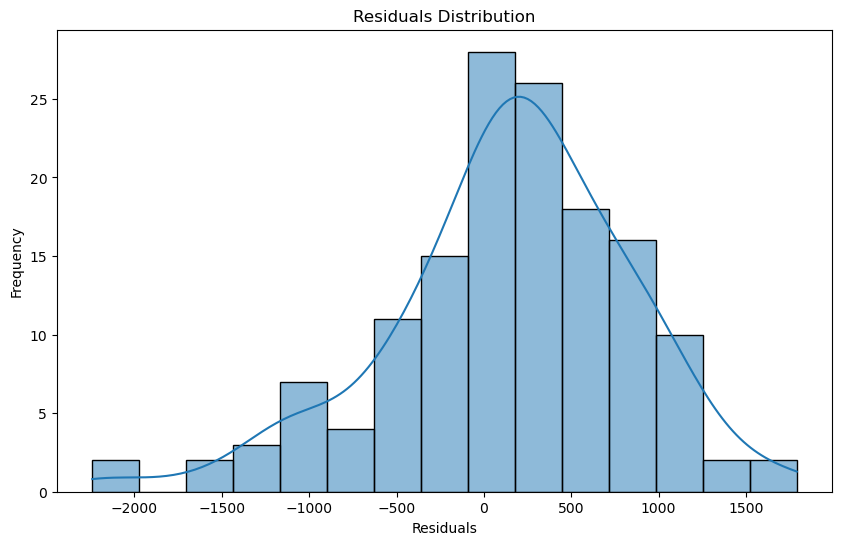

In [30]:
# Residual analysis: Plot the distribution of residuals (difference between actual and predicted values)
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


**Residual Analysis**:
- The residuals are approximately normally distributed, which is a good indication that the linear regression model's assumptions (such as homoscedasticity and normality of errors) are valid.


#### 7.1 Actual vs Predicted Values

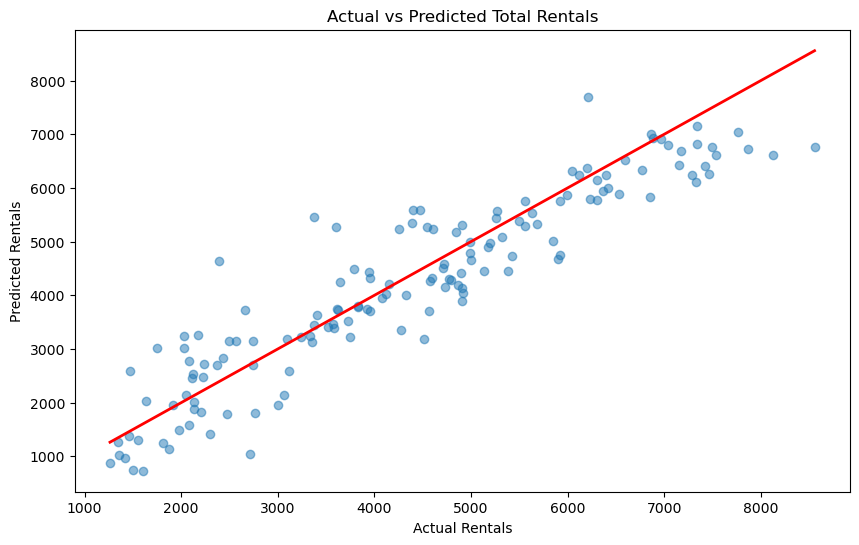

In [34]:
# Plot Actual vs Predicted values to visually assess the model's performance
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title('Actual vs Predicted Total Rentals')
plt.xlabel('Actual Rentals')
plt.ylabel('Predicted Rentals')
plt.show()


The red line in the plot represents the ideal case where actual and predicted values are equal. The scatter points are reasonably close to this line, indicating that the model performs well in predicting bike rentals.


### Final Observations


- The model explains 85.21% of the variance in total bike rentals, making it a good fit for the data.
- Temperature (`temp` and `atemp`) and weather conditions (`weathersit`) are important predictors of bike rentals.
- The residuals are normally distributed, and the model's performance is good based on both visual analysis and the evaluation metrics.
- Further improvement could be explored using more advanced regression techniques or feature engineering.
